### In this notebook, a observational rainfall dataset from Hawaii is applied to better understand the relationship between the 12 SOM node patterns and rainfall events in Hawaii.

### The dataset categorizes each day into 5 rainfall disturbance types: Non-disturbance (ND), Crossing-front (CF), Non-crossing Front (NC), Kona Low (KL), and Upper level low (UL)

### We count the frequencies of each disturbance type during each SOM node pattern to determine if the disturbances have preferred node patterns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
path = '/network/rit/lab/elisontimmlab_rit/kf835882/python/ERA5/hourly/'

In [3]:
# Load in locations of daily winning nodes from 1981-2010
#winners = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/ERA5/hourly/winners_sorted_test.npy') 
winners = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/ERA5/hourly/winners_sorted.npy') # use this for training dataset

In [5]:
# Convert to pandas dataframe
df1 = pd.DataFrame(winners)

In [6]:
# Rename columns
df1 = df1.rename({0: 'a', 1: 'b'}, axis='columns')

In [7]:
# Get time steps associated with each of the 12 nodes 
q1 = df1.query('a == 0.0')
node00 = q1.query('b == 0.0')

q01 = df1.query('a == 0.0')
node01 = q01.query('b == 1.0')

q02 = df1.query('a == 0.0')
node02 = q02.query('b == 2.0')

q10 = df1.query('a == 1.0')
node10 = q10.query('b == 0.0')

q11 = df1.query('a == 1.0')
node11 = q11.query('b == 1.0')

q12 = df1.query('a == 1.0')
node12 = q12.query('b == 2.0')

q20 = df1.query('a == 2.0')
node20 = q20.query('b == 0.0')

q21 = df1.query('a == 2.0')
node21 = q21.query('b == 1.0')

q22 = df1.query('a == 2.0')
node22 = q22.query('b == 2.0')

q30 = df1.query('a == 3.0')
node30 = q30.query('b == 0.0')

q31 = df1.query('a == 3.0')
node31 = q31.query('b == 1.0')

q32 = df1.query('a == 3.0')
node32 = q32.query('b == 2.0')

In [8]:
# Get dates from training data that are associated with each node
# Convert dates to pd dataframe
# Reformat dates to be same as 'Date' column in disturbance data
t_train = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/ERA5/hourly/t_train_sorted.npy')
#t_train = np.load('/network/rit/lab/elisontimmlab_rit/kf835882/python/ERA5/hourly/t_test_sorted.npy')

t_train=pd.to_datetime(t_train)
df_train = pd.DataFrame(t_train)

df_train[0] = pd.to_datetime(df_train[0]).dt.strftime('%m/%d/%Y')
df_train = df_train.rename(columns={0: 'Date'})
df_train['Date'] = df_train['Date'].str.lstrip('0')
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%m/%d/%Y').dt.strftime('%-m/%-d/%Y')

In [9]:
# Read in Hawaii disturbance data from Longman et al.
# Dataframe has been manipulated to have same indices as SOM data
ds = pd.read_csv('../csv_files/disturbance_timeseries_1990-2010_nov_apr_leap.csv')
df2 = pd.DataFrame(ds)

In [10]:
# Get indices
indices = np.arange(0,3806)
df2['Index2'] = indices

In [11]:
# Perform a right join to merge the training data with the disturbance dataset
merged = pd.merge(df2, df_train, on='Date', how='right')

In [12]:
# This new dataframe contains only the dates used for the SOM training
merged

,Unnamed: 0,Year,Month,Index2,Date,Mean_RF,N_Dis,Class,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,1990,1,0,1/1/1990,7.2,NaN,ND,NaN,NaN,Mean_RF,Mean gridded rainfall O?ahu
1,3,1990,1,3,1/4/1990,0.8,NaN,ND,NaN,NaN,Ncross,Non crossing front (O?ahu)
2,4,1990,1,4,1/5/1990,0.4,NaN,ND,NaN,NaN,Cross,Crossing front
3,5,1990,1,5,1/6/1990,0.1,NaN,ND,NaN,NaN,ND,Non disturbance (see paper for definition)
4,6,1990,1,6,1/7/1990,0.2,325.783773,Ncross,NaN,NaN,KL,Kona Low
...,...,...,...,...,...,...,...,...,...,...,...,...
3039,7665,2010,12,3801,12/27/2010,34.9,NaN,ND,NaN,NaN,NaN,NaN
3040,7666,2010,12,3802,12/28/2010,4.2,NaN,ND,NaN,NaN,NaN,NaN
3041,7667,2010,12,3803,12/29/2010,1.1,NaN,ND,NaN,NaN,NaN,NaN
3042,7668,2010,12,3804,12/30/2010,2.3,NaN,ND,NaN,NaN,NaN,NaN


In [13]:
# Get disturbance totals from training set
ND_clim = np.where(merged['Class'] == 'ND')
ND_len = np.shape(ND_clim)[1]
print("Training set: ")
print('ND: ',ND_len)

NC_clim = np.where(merged['Class'] == 'Ncross')
NC_len = np.shape(NC_clim)[1]
print('NC: ',NC_len)

CR_clim = np.where(merged['Class'] == 'Cross')
CR_len = np.shape(CR_clim)[1]
print('CR: ',CR_len)

KL_clim = np.where(merged['Class'] == 'KL')
KL_len = np.shape(KL_clim)[1]
print('KL: ',KL_len)

UL_clim = np.where(merged['Class'] == 'UL')
UL_len = np.shape(UL_clim)[1]
print('UL: ',UL_len)

RF_dist = CR_len + KL_len + UL_len
RF_clim = (RF_dist / 3806) * 100
print('CR+KL+UL: ',RF_dist)

Training set: 
ND:  2147
NC:  243
CR:  388
KL:  157
UL:  109
CR+KL+UL:  654


In [14]:
# Get climatological mean frequencies of each disturbance type
ND_clim = np.where(df2['Class'] == 'ND')
ND_len = np.shape(ND_clim)[1]
print(ND_len)
ND_clim = (ND_len / 3806)*100

NC_clim = np.where(df2['Class'] == 'Ncross')
NC_len = np.shape(NC_clim)[1]
print(NC_len)
NC_clim = (NC_len / 3806)*100

CR_clim = np.where(df2['Class'] == 'Cross')
CR_len = np.shape(CR_clim)[1]
print(CR_len)
CR_clim = (CR_len / 3806)*100

KL_clim = np.where(df2['Class'] == 'KL')
KL_len = np.shape(KL_clim)[1]
print(KL_len)
KL_clim = (KL_len / 3806)*100

UL_clim = np.where(df2['Class'] == 'UL')
UL_len = np.shape(UL_clim)[1]
print(UL_len)
UL_clim = (UL_len / 3806)*100

RF_dist = CR_len + KL_len + UL_len
RF_clim = (RF_dist / 3806) * 100
print(RF_dist)

2643
318
501
199
145
845


In [15]:
# Create empty arrays for disturbance frequencies
ND_freq = np.zeros(shape=(4,3))
NC_freq = np.zeros(shape=(4,3))
CR_freq = np.zeros(shape=(4,3))
KL_freq = np.zeros(shape=(4,3))
UL_freq = np.zeros(shape=(4,3))

In [16]:
ND_count = np.zeros(shape=(4,3))
NC_count = np.zeros(shape=(4,3))
CR_count = np.zeros(shape=(4,3))
KL_count = np.zeros(shape=(4,3))
UL_count = np.zeros(shape=(4,3))

In [17]:
nodelist = [node00,node01,node02,node10,node11,node12,node20,node21,node22,node30,node31,node32]
ij_list=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2)]

m=0
for n in nodelist:
    node = n
    i,j = ij_list[m]
    print('====================================')
    print('Node: ',i,j)
    
    if len(node.index) > 0:
        # Calculate disturbance type frequencies
        ALL = len(merged['Class'][node.index])

        ND = np.where(merged['Class'][node.index] == 'ND')
        ND = np.shape(ND)[1]
        ND_count[i,j] = ND
        print('ND: ',ND)
        ND = (ND/ALL)*100
        ND_freq[i,j] = ND

        CR = np.where(merged['Class'][node.index] == 'Cross')
        CR = np.shape(CR)[1]
        CR_count[i,j] = CR
        print('CR: ',CR)
        CR = (CR/ALL)*100
        CR_freq[i,j] = CR

        NC = np.where(merged['Class'][node.index] == 'Ncross')
        NC = np.shape(NC)[1]
        NC_count[i,j] = NC
        print('NC: ',NC)
        NC = (NC/ALL)*100
        NC_freq[i,j] = NC

        KL = np.where(merged['Class'][node.index] == 'KL')
        KL = np.shape(KL)[1]
        KL_count[i,j] = KL
        print('KL: ',KL)
        KL = (KL/ALL)*100
        KL_freq[i,j] = KL

        UL = np.where(merged['Class'][node.index] == 'UL')
        UL = np.shape(UL)[1]
        UL_count[i,j] = UL
        print('UL: ',UL)
        UL = (UL/ALL)*100
        UL_freq[i,j] = UL
    
        m+=1

Node:  0 0
ND:  187
CR:  26
NC:  11
KL:  40
UL:  4
Node:  0 1
ND:  162
CR:  21
NC:  18
KL:  31
UL:  14
Node:  0 2
ND:  67
CR:  39
NC:  16
KL:  5
UL:  5
Node:  1 0
ND:  195
CR:  17
NC:  9
KL:  21
UL:  11
Node:  1 1
ND:  109
CR:  20
NC:  6
KL:  9
UL:  3
Node:  1 2
ND:  153
CR:  74
NC:  47
KL:  0
UL:  0
Node:  2 0
ND:  250
CR:  10
NC:  5
KL:  16
UL:  29
Node:  2 1
ND:  137
CR:  16
NC:  8
KL:  2
UL:  2
Node:  2 2
ND:  232
CR:  45
NC:  42
KL:  2
UL:  6
Node:  3 0
ND:  275
CR:  35
NC:  23
KL:  19
UL:  18
Node:  3 1
ND:  206
CR:  29
NC:  22
KL:  9
UL:  9
Node:  3 2
ND:  174
CR:  56
NC:  36
KL:  3
UL:  8


In [18]:
np.save('../np_arrays/ND_count_unlabeled.npy',ND_count)
np.save('../np_arrays/NC_count_unlabeled.npy',NC_count)
np.save('../np_arrays/CR_count_unlabeled.npy',CR_count)
np.save('../np_arrays/KL_count_unlabeled.npy',KL_count)
np.save('../np_arrays/UL_count_unlabeled.npy',UL_count)

In [19]:
# Save disturbance frequencies
np.save('../np_arrays/ND_frequencies_unlabeled.npy',ND_freq)
np.save('../np_arrays/NC_frequencies_unlabeled.npy',NC_freq)
np.save('../np_arrays/CR_frequencies_unlabeled.npy',CR_freq)
np.save('../np_arrays/KL_frequencies_unlabeled.npy',KL_freq)
np.save('../np_arrays/UL_frequencies_unlabeled.npy',UL_freq)

In [20]:
# Load in frequencies 4x3
ND_freq = np.load('../np_arrays/ND_frequencies_unlabeled.npy')
NC_freq = np.load('../np_arrays/NC_frequencies_unlabeled.npy')
CR_freq = np.load('../np_arrays/CR_frequencies_unlabeled.npy')
KL_freq = np.load('../np_arrays/KL_frequencies_unlabeled.npy')
UL_freq = np.load('../np_arrays/UL_frequencies_unlabeled.npy')
RF_freq = CR_freq + KL_freq + UL_freq

In [21]:
# Calculate frequencies compared to baseline frequency
ND_freq = ND_freq - ND_clim
NC_freq = NC_freq - NC_clim
CR_freq = CR_freq - CR_clim
KL_freq = KL_freq - KL_clim
UL_freq = UL_freq - UL_clim
RF_freq = RF_freq - RF_clim

In [22]:
# Get totals for each disturbance
ND_total = np.sum(ND_count)
NC_total = np.sum(NC_count)
CR_total = np.sum(CR_count)
KL_total = np.sum(KL_count)
UL_total = np.sum(UL_count)

In [23]:
# Significance at 5% level
nd_sig = np.array([[0,1,1,1],[0,0,1,0],[1,1,0,1]])
nc_sig = np.array([[1,1,1,0],[0,1,0,0],[1,1,1,1]])
cr_sig = np.array([[0,1,1,1],[1,0,1,0],[1,1,0,1]])
kl_sig = np.array([[1,1,0,0],[1,0,1,0],[0,1,1,1]])
ul_sig = np.array([[1,0,1,0],[0,0,0,0],[0,1,1,0]])
all_sig = np.array([[1,0,1,0],[1,0,1,1],[1,1,1,0]])

In [24]:
nd_sig_test = np.array([[1,1,0,0],[0,0,1,0],[0,1,0,0]])
nc_sig_test = np.array([[0,0,1,0],[0,0,0,0],[0,1,0,0]])
cr_sig_test = np.array([[1,0,0,0],[0,0,0,0],[1,1,0,1]])
kl_sig_test = np.array([[1,0,0,0],[1,0,0,0],[0,1,1,1]])
ul_sig_test = np.array([[0,0,1,0],[0,0,0,0],[0,0,0,0]])
all_sig_test = np.array([[0,0,0,0],[0,0,1,0],[0,0,0,0]])

## Plot frequencies of each Hawaiian rainfall disturbance type during the 12 node patterns

In [25]:
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=-10, vmax=8.1, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

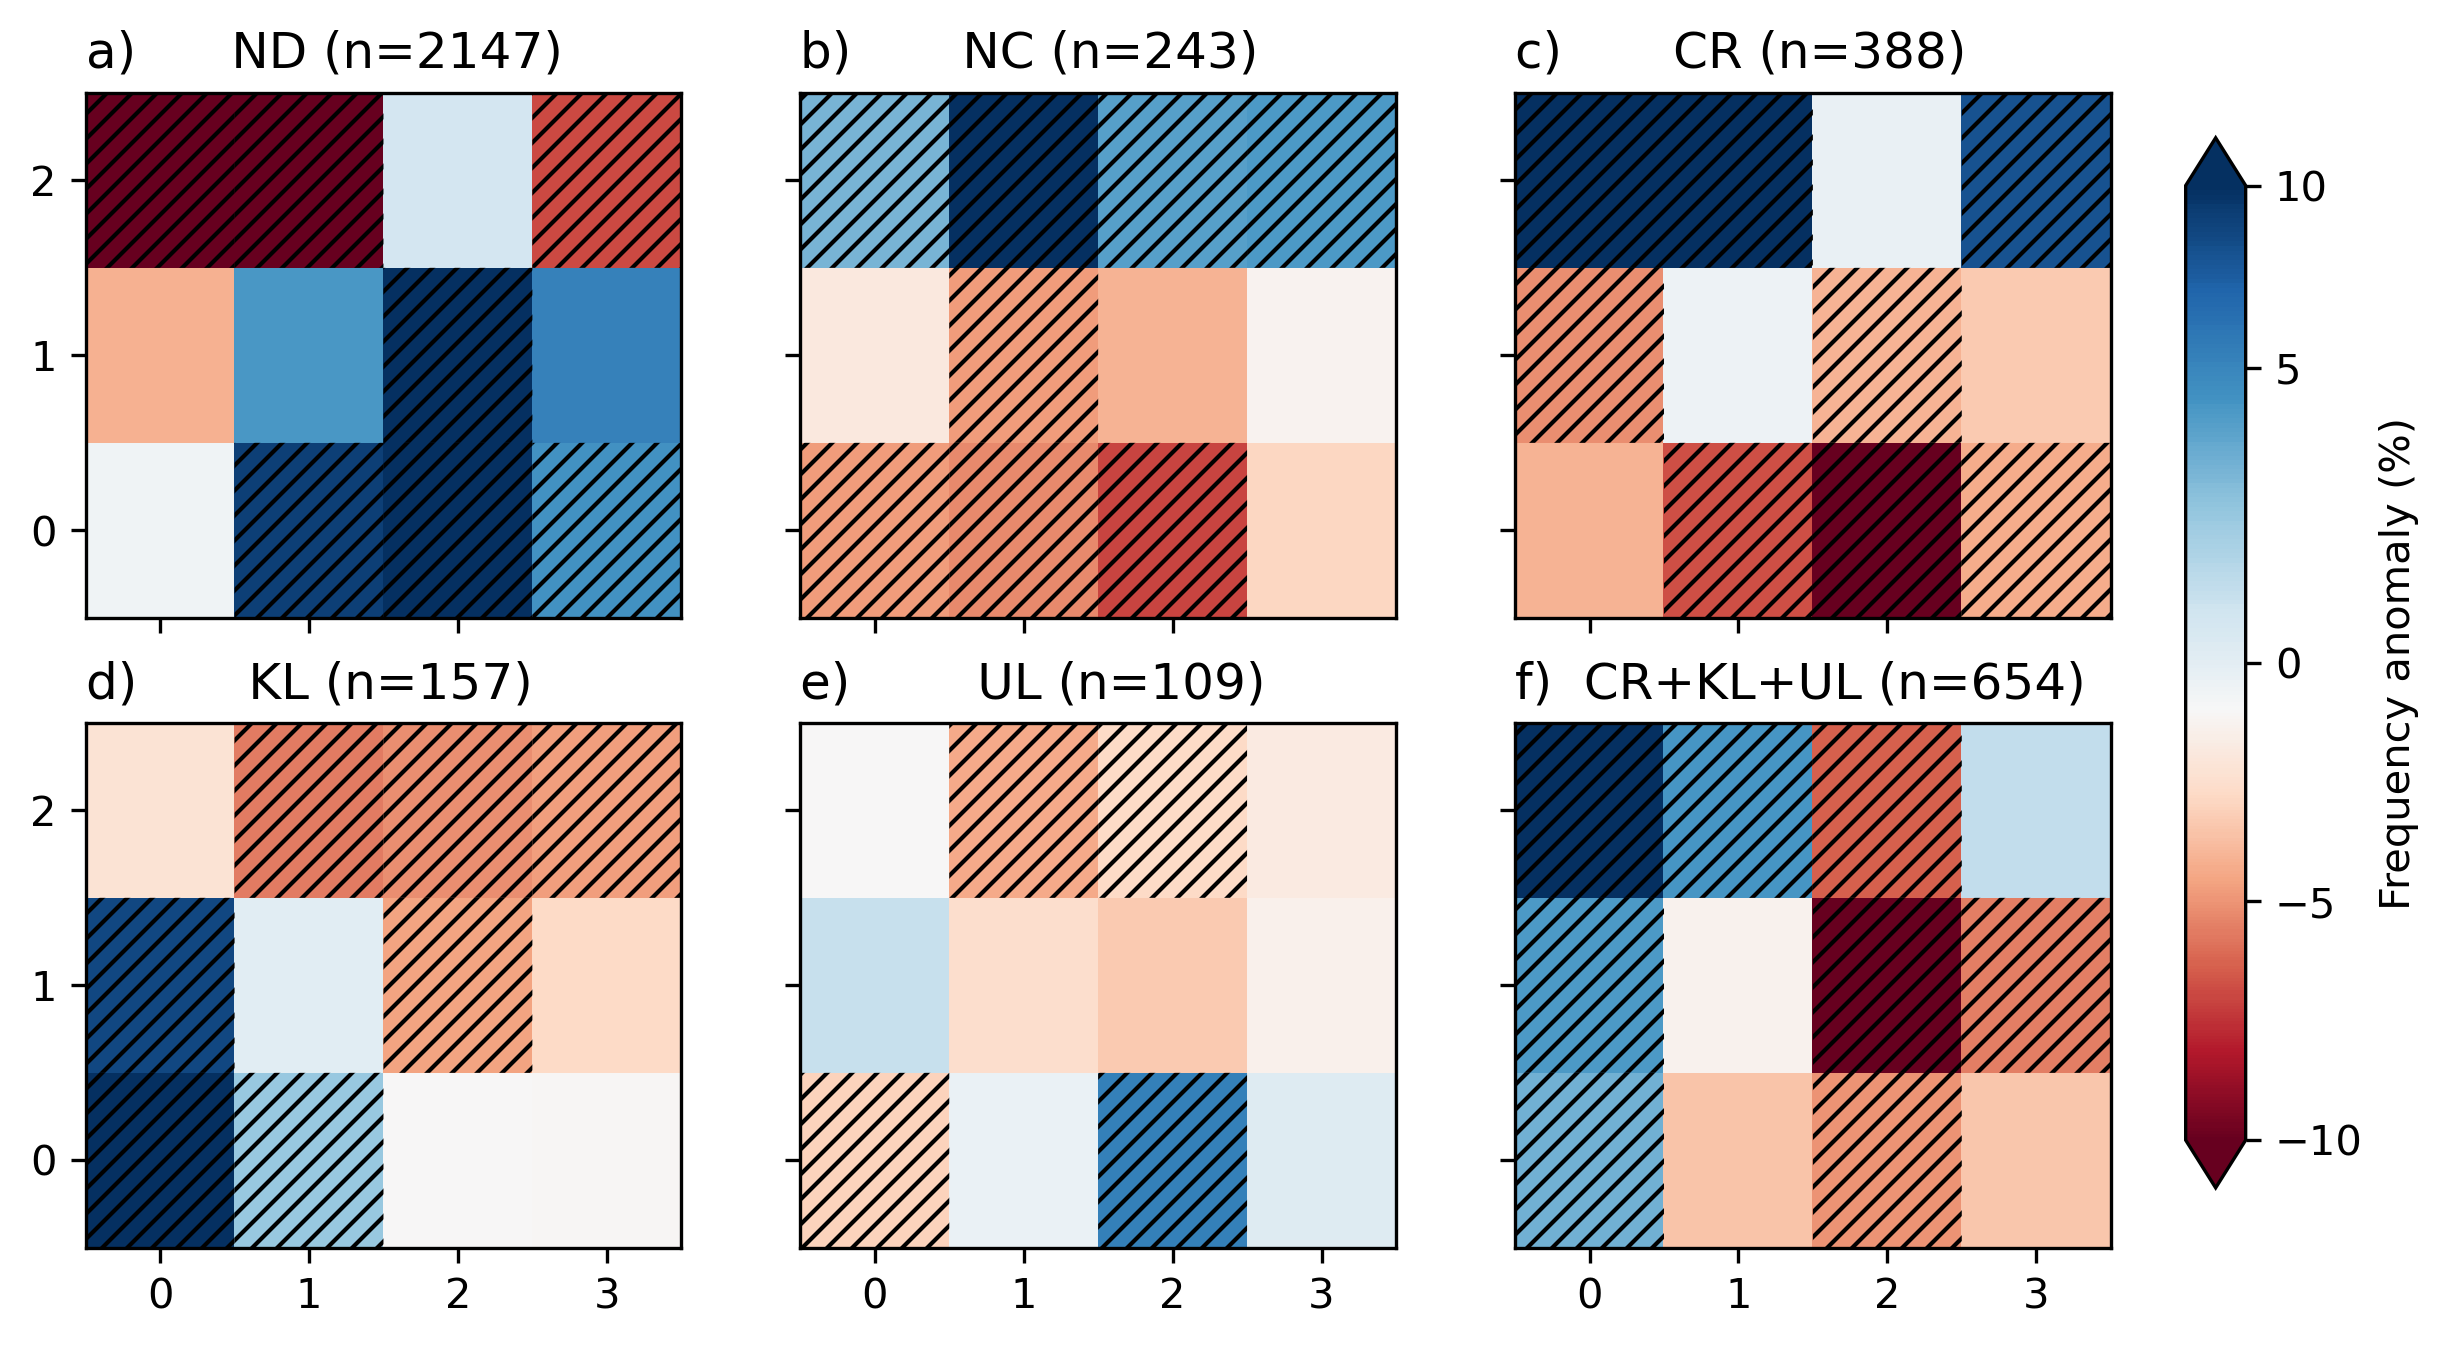

In [26]:
# Plot heat maps of disturbance type frequencies for each node
from pylab import plot,axis,show,pcolor,colorbar,bone

fig = plt.figure(figsize=(10,5),dpi=300)

plt.subplot(2,3,1)
subplot1 = pcolor(ND_freq.T, cmap='RdBu', norm=MidpointNormalize(midpoint=0))
pcolor(np.ma.masked_where(nd_sig==0,nd_sig),hatch='////',alpha=0)
#pcolor(np.ma.masked_where(nd_sig_test==0,nd_sig_test),hatch='////',alpha=0)
plt.xticks(ticks = np.arange(0.5,3.5,1),labels=['','',''])
plt.yticks(ticks = np.arange(0.5,3.5,1), labels=['0','1','2'])
plt.title('a)      ND (n='+str(int(ND_total))+')',loc='left')
#colorbar()

plt.subplot(2,3,2)
pcolor(NC_freq.T, cmap='RdBu', norm=MidpointNormalize(midpoint=0))
pcolor(np.ma.masked_where(nc_sig==0,nc_sig),hatch='////',alpha=0)
#pcolor(np.ma.masked_where(nc_sig_test==0,nc_sig_test),hatch='////',alpha=0)
plt.xticks(ticks = np.arange(0.5,3.5,1),labels=['','',''])
plt.yticks(ticks = np.arange(0.5,3.5,1), labels=['','',''])
plt.title('b)       NC (n='+str(int(NC_total))+')',loc='left')
#colorbar()

plt.subplot(2,3,3)
pcolor(CR_freq.T, cmap='RdBu', norm=MidpointNormalize(midpoint=0))
pcolor(np.ma.masked_where(cr_sig==0,cr_sig),hatch='////',alpha=0)
#pcolor(np.ma.masked_where(cr_sig_test==0,cr_sig_test),hatch='////',alpha=0)
plt.xticks(ticks = np.arange(0.5,3.5,1),labels=['','',''])
plt.yticks(ticks = np.arange(0.5,3.5,1), labels=['','',''])
plt.title('c)       CR (n='+str(int(CR_total))+')',loc='left')
#colorbar()

plt.subplot(2,3,4)
pcolor(KL_freq.T, cmap='RdBu', norm=MidpointNormalize(midpoint=0))
pcolor(np.ma.masked_where(kl_sig==0,kl_sig),hatch='////',alpha=0)
#pcolor(np.ma.masked_where(kl_sig_test==0,kl_sig_test),hatch='////',alpha=0)
plt.xticks(ticks = np.arange(0.5,4.5,1),labels=['0','1','2','3'])
plt.yticks(ticks = np.arange(0.5,3.5,1), labels=['0','1','2'])
plt.title('d)       KL (n='+str(int(KL_total))+')',loc='left')
#colorbar()

plt.subplot(2,3,5)
pcolor(UL_freq.T, cmap='RdBu', norm=MidpointNormalize(midpoint=0))
pcolor(np.ma.masked_where(ul_sig==0,ul_sig),hatch='////',alpha=0)
#pcolor(np.ma.masked_where(ul_sig_test==0,ul_sig_test),hatch='////',alpha=0)
plt.xticks(ticks = np.arange(0.5,4.5,1),labels=['0','1','2','3'])
plt.yticks(ticks = np.arange(0.5,3.5,1), labels=['','',''])
plt.title('e)        UL (n='+str(int(UL_total))+')',loc='left')
#colorbar()

plt.subplot(2,3,6)
pcolor(RF_freq.T, cmap='RdBu', norm=MidpointNormalize(midpoint=0))
pcolor(np.ma.masked_where(all_sig==0,all_sig),hatch='////',alpha=0)
#pcolor(np.ma.masked_where(all_sig_train==0,all_sig_test),hatch='////',alpha=0)
plt.xticks(ticks = np.arange(0.5,4.5,1),labels=['0','1','2','3'])
plt.yticks(ticks = np.arange(0.5,3.5,1), labels=['','',''])
RF_total = CR_total + KL_total + UL_total
plt.title('f)  CR+KL+UL (n='+str(int(RF_total))+')',loc='left')
#colorbar()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.15, 0.02, 0.7])
cbar = fig.colorbar(subplot1, cax=cbar_ax, ticks = np.arange(-10, 12.5, 5), orientation='vertical', extend='both',shrink = 0.0, pad = 0.0)
cbar.set_label('Frequency anomaly (%)')

plt.savefig('disturbance_freq_heatmap_unlabeled.png')

### It's clear that some disturbance types prefer certain NPJ patterns, for example KLs prefer a zonally retracted jet, while CRs and NCs prefer a zonally extended or equatorward shifted jet.

# ROC curve
### 'true positives' are where disturbance frequency is greater than clim
### 'false positives' are where disturbance frequency is lower than clim

In [29]:
nd_tpr = np.sum(ND_count[ND_freq > 0]) / (np.sum(ND_count[ND_freq>0])+np.sum(NC_count[ND_freq > 0])+np.sum(CR_count[ND_freq > 0])+np.sum(KL_count[ND_freq > 0])+np.sum(UL_count[ND_freq > 0]))
nd_fpr = (np.sum(NC_count[ND_freq > 0])+np.sum(CR_count[ND_freq > 0])+np.sum(KL_count[ND_freq > 0])+np.sum(UL_count[ND_freq > 0])) / (np.sum(ND_count[ND_freq>0])+np.sum(NC_count[ND_freq > 0])+np.sum(CR_count[ND_freq > 0])+np.sum(KL_count[ND_freq > 0])+np.sum(UL_count[ND_freq > 0]))

In [30]:
nc_tpr = np.sum(NC_count[NC_freq > 0]) / (np.sum(ND_count[NC_freq>0])+np.sum(NC_count[NC_freq > 0])+np.sum(CR_count[NC_freq > 0])+np.sum(KL_count[NC_freq > 0])+np.sum(UL_count[NC_freq > 0]))
nc_fpr = (np.sum(ND_count[NC_freq > 0])+np.sum(CR_count[NC_freq > 0])+np.sum(KL_count[NC_freq > 0])+np.sum(UL_count[NC_freq > 0])) / (np.sum(ND_count[NC_freq>0])+np.sum(NC_count[NC_freq > 0])+np.sum(CR_count[NC_freq > 0])+np.sum(KL_count[NC_freq > 0])+np.sum(UL_count[NC_freq > 0]))

In [31]:
cr_tpr = np.sum(CR_count[CR_freq > 0]) / (np.sum(ND_count[CR_freq>0])+np.sum(NC_count[CR_freq > 0])+np.sum(CR_count[CR_freq > 0])+np.sum(KL_count[CR_freq > 0])+np.sum(UL_count[CR_freq > 0]))
cr_fpr = (np.sum(ND_count[CR_freq > 0])+np.sum(NC_count[CR_freq>0])+np.sum(KL_count[CR_freq>0])+np.sum(UL_count[CR_freq>0])) / (np.sum(ND_count[CR_freq>0])+np.sum(NC_count[CR_freq > 0])+np.sum(CR_count[CR_freq > 0])+np.sum(KL_count[CR_freq > 0])+np.sum(UL_count[CR_freq > 0]))

In [32]:
kl_tpr = np.sum(KL_count[KL_freq > 0]) / (np.sum(ND_count[KL_freq>0])+np.sum(NC_count[KL_freq > 0])+np.sum(CR_count[KL_freq > 0])+np.sum(KL_count[KL_freq > 0])+np.sum(UL_count[KL_freq > 0]))
kl_fpr = (np.sum(ND_count[KL_freq > 0])+np.sum(NC_count[KL_freq>0])+np.sum(CR_count[KL_freq>0])+np.sum(UL_count[KL_freq>0])) / (np.sum(ND_count[KL_freq>0])+np.sum(NC_count[KL_freq > 0])+np.sum(CR_count[KL_freq > 0])+np.sum(KL_count[KL_freq > 0])+np.sum(UL_count[KL_freq > 0]))

In [33]:
ul_tpr = np.sum(UL_count[UL_freq > 0]) / (np.sum(ND_count[UL_freq>0])+np.sum(NC_count[UL_freq > 0])+np.sum(CR_count[UL_freq > 0])+np.sum(KL_count[UL_freq > 0])+np.sum(UL_count[UL_freq > 0]))
ul_fpr = (np.sum(ND_count[UL_freq > 0])+np.sum(NC_count[UL_freq>0])+np.sum(KL_count[UL_freq>0])+np.sum(CR_count[UL_freq>0])) / (np.sum(ND_count[UL_freq>0])+np.sum(NC_count[UL_freq > 0])+np.sum(CR_count[UL_freq > 0])+np.sum(KL_count[UL_freq > 0])+np.sum(UL_count[UL_freq > 0]))

Text(0.5, 1.0, 'ROC curve (training set)')

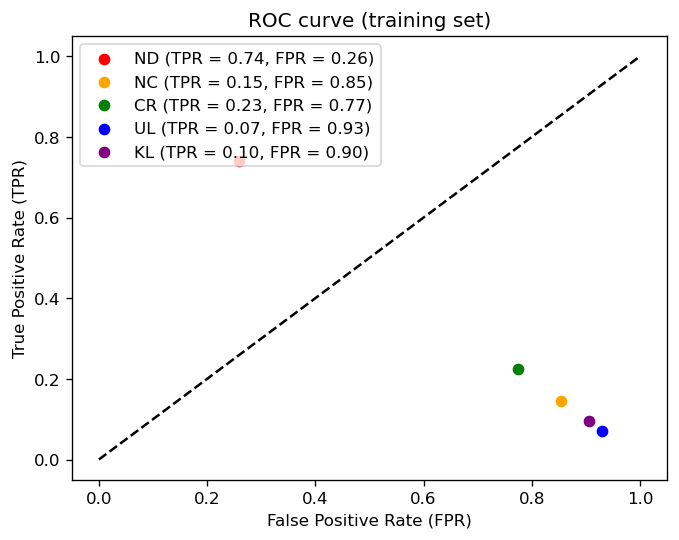

In [34]:
from sklearn.metrics import roc_curve, auc

plt.figure(dpi=120)
plt.scatter(nd_fpr, nd_tpr, color='red', marker='o', label='ND (TPR = {:.2f}, FPR = {:.2f})'.format(nd_tpr, nd_fpr))
plt.scatter(nc_fpr, nc_tpr, color='orange', marker='o', label='NC (TPR = {:.2f}, FPR = {:.2f})'.format(nc_tpr, nc_fpr))
plt.scatter(cr_fpr, cr_tpr, color='green', marker='o', label='CR (TPR = {:.2f}, FPR = {:.2f})'.format(cr_tpr, cr_fpr))
plt.scatter(ul_fpr, ul_tpr, color='blue', marker='o', label='UL (TPR = {:.2f}, FPR = {:.2f})'.format(ul_tpr, ul_fpr))
plt.scatter(kl_fpr, kl_tpr, color='purple', marker='o', label='KL (TPR = {:.2f}, FPR = {:.2f})'.format(kl_tpr, kl_fpr))
plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.title('ROC curve (training set)')

# Calculate Brier Skill score and confidence interval for each disturbance type

In [50]:
# Do this for each disturbance type
dist_binary = []
dist_probs = []
dist_ref = []

In [51]:
node_list = [node00,node01,node02,node10,node11,node12,node20,node21,node22,node30,node31,node32]

n=0
for i in range(0,4):
    for j in range(0,3):
        node=node_list[n]
        #print(i,j)
        count = KL_count[i,j]
        if KL_freq[i,j] > 0:
            dist_binary += [1] * int(KL_count[i,j])
        else: 
            dist_binary += [0] * int(KL_count[i,j])
            
        dist_probs += [((KL_count[i,j] / len(node)))] * int(KL_count[i,j])
        dist_ref += [KL_clim/100] * int(KL_count[i,j])

        n+=1

In [52]:
from sklearn.metrics import brier_score_loss

# Assuming y_true is the true binary labels (0 or 1) and y_probs_model is the predicted probabilities of the model
# Also assuming y_probs_reference is the predicted probabilities of the reference model
# Replace these with your actual data
y_true = np.array(dist_binary)
y_probs_model = np.array(dist_probs)
y_probs_reference = np.array(dist_ref)

# Calculate Brier scores
bs_model = brier_score_loss(y_true, y_probs_model)
bs_reference = brier_score_loss(y_true, y_probs_reference)

# Calculate Brier Skill Score
bss = 1 - (bs_model / bs_reference)

##########################################################################################################
##########################################################################################################

observed = y_true
predicted_probs = np.round(y_probs_model,2)
ref_probs = np.round(y_probs_reference,2)

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Function to calculate Brier Skill Score
def calculate_bss(observed, predicted_probs,ref_probs):
    bs_reference = brier_score_loss(observed, ref_probs)
    bs_model = brier_score_loss(observed, predicted_probs)
    bss = 1 - (bs_model / bs_reference)
    return bss

# Bootstrap resampling
bss_values = []
for _ in range(n_bootstrap_samples):
    indices = np.random.choice(len(observed), len(observed), replace=True)
    bootstrap_observed = observed[indices]
    bootstrap_predicted_probs = predicted_probs[indices]
    bootstrap_ref_probs = ref_probs[indices]
    bss = calculate_bss(bootstrap_observed, bootstrap_predicted_probs,bootstrap_ref_probs)
    bss_values.append(bss)

# Calculate confidence interval
confidence_interval = np.percentile(bss_values, [2.5, 97.5])


print(f"Brier Skill Score: {bss:.4f}")
print(f"Bootstrap BSS Confidence Interval: {confidence_interval}")

Brier Skill Score: 0.1179
Bootstrap BSS Confidence Interval: [0.09891256 0.14914165]


# What other disturbance types make up the 'KL node'?

In [35]:
i,j = 0,0

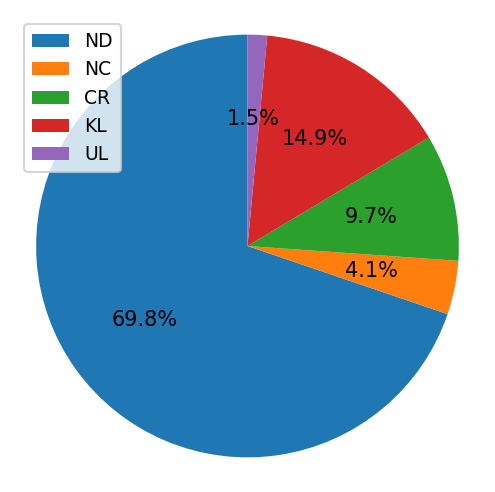

In [36]:
# Create pie charts for disturbance type frequencies for each node
labels = 'ND','NC','CR','KL','UL'
sizes = [ND_count[i,j],NC_count[i,j],CR_count[i,j],KL_count[i,j],UL_count[i,j]]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots(figsize=(4,4),dpi=150)
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=False,startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('')
plt.legend(labels,loc='best',fontsize=9)
plt.show()

# 'Goodness of fit' test for each node

In [37]:
# This will tell us how well the disturbance frequencies in each node match the observed frequencies
from scipy.stats import chi2_contingency

expected_values = np.array([69, 8, 13, 5, 4])

observed_values = np.zeros(shape=(5))
node = node32
i,j = 3,2

observed_values[0] = (int(ND_count[i,j]) / len(node)) * 100
observed_values[1] = (int(NC_count[i,j]) / len(node)) * 100
observed_values[2] = (int(CR_count[i,j]) / len(node)) * 100
observed_values[3] = (int(KL_count[i,j]) / len(node)) * 100
observed_values[4] = (int(UL_count[i,j]) / len(node)) * 100

chi2_stat, p_value, dof, expected = chi2_contingency([observed_values, expected_values])

# Print results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 5.743774099212803
P-value: 0.2191179627055617
Degrees of freedom: 4
Expected frequencies:
[[66.23913793 10.55094969 16.69176206  3.05680025  3.46135007]
 [65.57674655 10.4454402  16.52484444  3.02623224  3.42673657]]


In [38]:
observed_values

array([62.81588448, 12.99638989, 20.2166065 ,  1.08303249,  2.88808664])